In [2]:
import Pkg; Pkg.instantiate()
Pkg.activate(".")
using DrugResponseModel
using Plots
Plots.scalefontsizes(0.7)
concs, _, g1s1, g2s1 = load(189, 1);
_, _, g1s2, g2s2 = load(189, 2);
_, _, g1s3, g2s3 = load(189, 3);
g0 = g1s1[1,1,1]+g2s1[1,1,1];
g1m = (g1s1 .+ g1s2 .+ g1s3) ./ 3;
g2m = (g2s1 .+ g2s2 .+ g2s3) ./ 3;

  Activating environment at `~/ODE/DrugResponseModel.jl/Project.toml`


In [2]:

a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 1, 2)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 21766 evals, 21659 steps, improv/step: 0.137 (last = 0.1368), fitness=9497.956896511
DE modify state:
200.01 secs, 43444 evals, 43338 steps, improv/step: 0.124 (last = 0.1112), fitness=8549.706093527
DE modify state:
300.01 secs, 65175 evals, 65071 steps, improv/step: 0.123 (last = 0.1221), fitness=8098.792847612
DE modify state:
400.04 secs, 86868 evals, 86766 steps, improv/step: 0.129 (last = 0.1442), fitness=7800.511276767
DE modify state:
500.05 secs, 108609 evals, 108508 steps, improv/step: 0.129 (last = 0.1321), fitness=7746.688789638
DE modify state:
600.05 secs, 130214 evals, 130116 steps, improv/step: 0.130 (last = 0.1348), fitness=7652.177405682
DE modify state:
700.05 secs, 15

(7600.654066033653, [42.187359200101696, 1.4057108942350212, 0.04149696704648116, 0.7665985833305696, 2.250876912096226, 0.0037879640413240067, 0.0032088573190743965, 0.009146411921154382, 0.36493368032641993, 0.3431792066117417  …  0.9925782939478379, 0.3897871109961421, 0.9080595721398131, 0.4921847818719821, 0.12463192798772507, 0.3400346287841216, 0.46868811223752227, 0.018725333229326045, 2.2144070211893837e-6, 0.00013074760316414226])

In [4]:
p1 = [42.1874, 1.40571, 0.041497, 0.766599, 2.25088, 0.00378796, 0.00320886, 0.00914641, 0.364934, 0.343179, 0.66096, 0.40793, 0.718425, 0.65888, 57.2492, 1.57452, 7.21028e-6, 0.159774, 2.99989, 0.0160534, 4.39708e-6, 0.689925, 0.999261, 0.219595, 0.992578, 0.389787, 0.90806, 0.492185, 0.124632, 0.340035, 0.468688, 0.0187253, 2.21441e-6, 0.000130748];

In [9]:
function Predict(p, g_0, t::Union{Real, LinRange}, g1data = nothing, g2data = nothing)
    if g_0 isa Real
        v = Vector{eltype(p)}(undef, nSp)
        v[1:nG1] .= 0.5 * g_0 / nG1
        v[(nG1+1):end] .= (1.0 - 0.5) * g_0 / nG2
    else
        v = g_0
    end

    if t isa Real
        A = DrugResponseModel.ODEjac(p, t)

        v = A * v
        G1, G2 = DrugResponseModel.vTOg(v)
    else
        # Some assumptions
        @assert t.start == 0.0
        A = DrugResponseModel.ODEjac(p, t[2])
        u = similar(v)

        if g1data === nothing
            G1 = Vector{eltype(p)}(undef, length(t))
            G2 = Vector{eltype(p)}(undef, length(t))

            for ii = 1:length(t)
                G1[ii], G2[ii] = DrugResponseModel.vTOg(v)

                mul!(u, A, v)
                copyto!(v, u)
            end
        else
            cost = 0.0

            for ii = 1:length(t)
                G1, G2 = DrugResponseModel.vTOg(v)
                cost += norm(G1 - g1data[ii]) + norm(G2 - g2data[ii])

                mul!(u, A, v)
                copyto!(v, u)
            end

            return cost, v
        end
    end

    return G1, G2, v
end

Predict (generic function with 3 methods)

In [12]:
p= [42.1874, 1.40571, 0.041497, 0.766599, 2.25088, 0.00378796, 0.00320886, 0.00914641, 0.364934, 0.343179, 0.66096, 0.40793, 0.718425, 0.65888, 57.2492, 1.57452, 7.21028e-6, 0.159774, 2.99989, 0.0160534, 4.39708e-6, 0.689925, 0.999261, 0.219595, 0.992578, 0.389787, 0.90806, 0.492185, 0.124632, 0.340035, 0.468688, 0.0187253, 2.21441e-6, 0.000130748];
pp1 = DrugResponseModel.getODEparams(p, concs);

In [13]:
const nSp = 28
const nG1 = 8
const nG2 = 20
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = Predict(pp1[:, i, k], 20.0, t)
    end
end

LoadError: UndefVarError: vTOg not defined

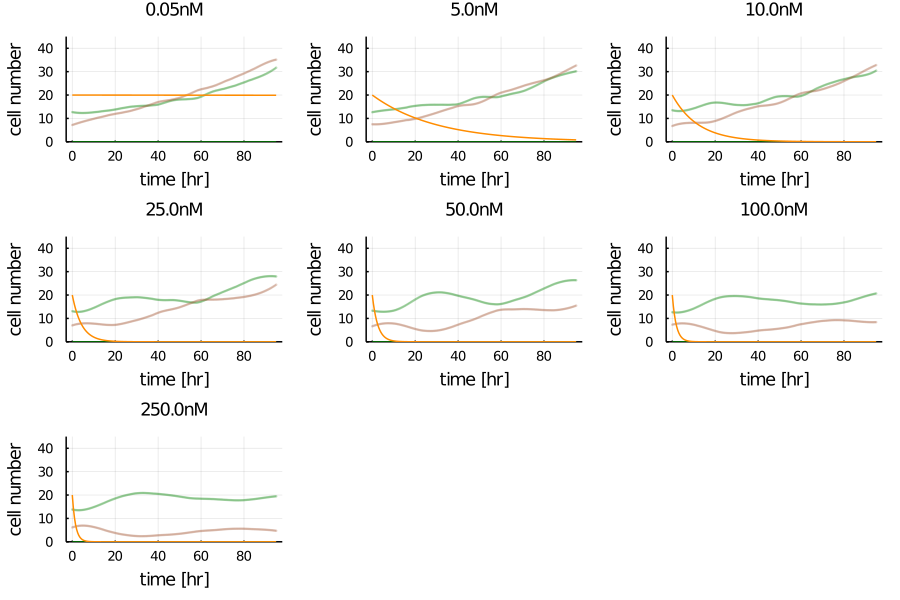

In [12]:
using Plots


G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], pp1[:, 1, k], t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], 1, :false, concs[1, 1])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], i, :false, concs[i, 1]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

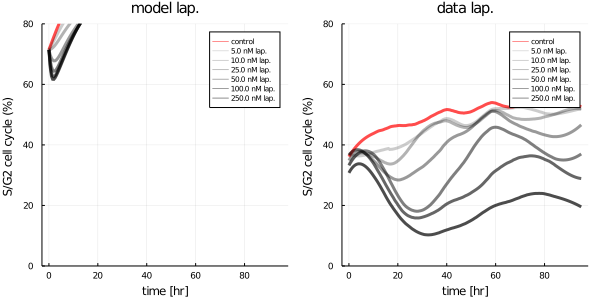

In [5]:
gdata2 = g2m ./ (g2m .+ g1m);
g2 = G2 ./(G1 .+ G2);
p1=DrugResponseModel.plotperc(g2[:, :, 1], "lap.", concs[:, 1], "model")
p2=DrugResponseModel.plotperc(gdata2[:, :, 1], "lap.", concs[:, 1], "data")
plot(p1, p2)

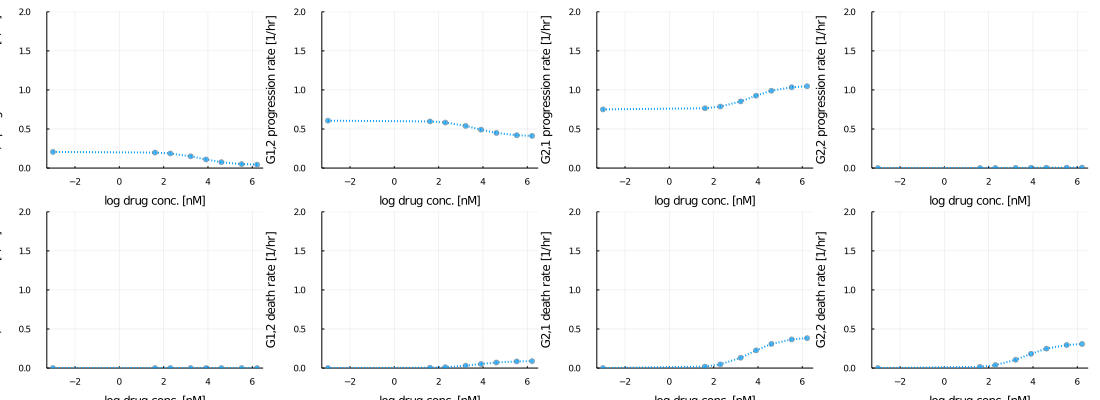

In [6]:
DrugResponseModel.plot_parameters(concs[:, 1], pp1[:, :, 1], zeros(8, 7))

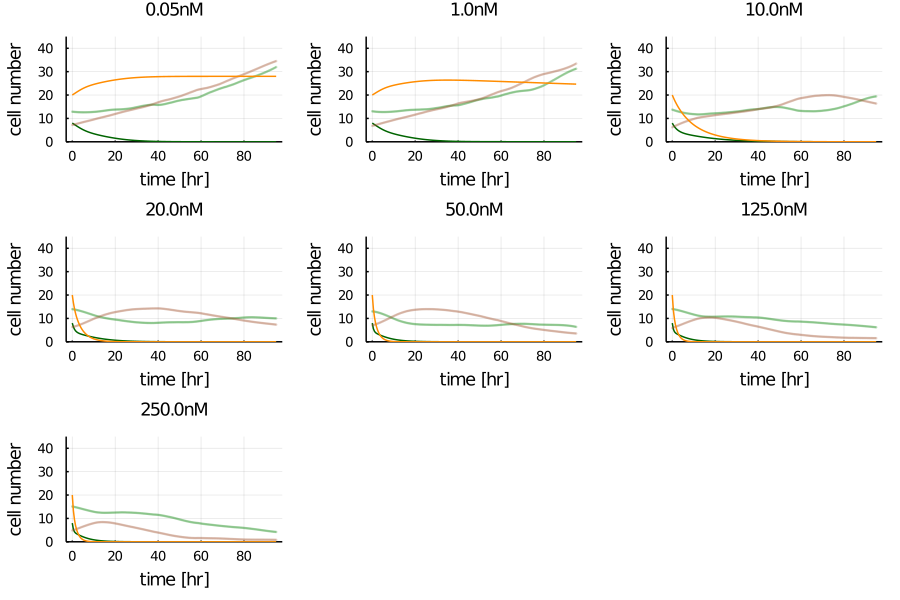

In [7]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 2], g2m[:, :, 2], 1, :false, concs[1, 2])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 2], g2m[:, :, 2], i, :false, concs[i, 2]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

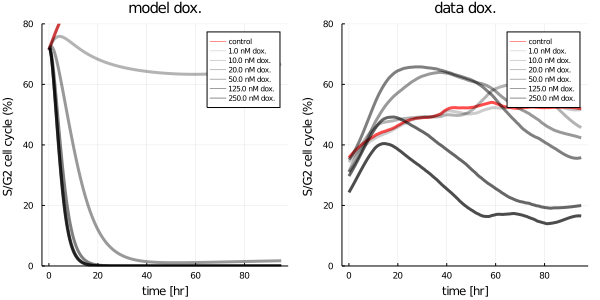

In [8]:
p1=DrugResponseModel.plotperc(g2[:, :, 2], "dox.", concs[:, 2], "model")
p2=DrugResponseModel.plotperc(gdata2[:, :, 2], "dox.", concs[:, 2], "data")
plot(p1, p2)

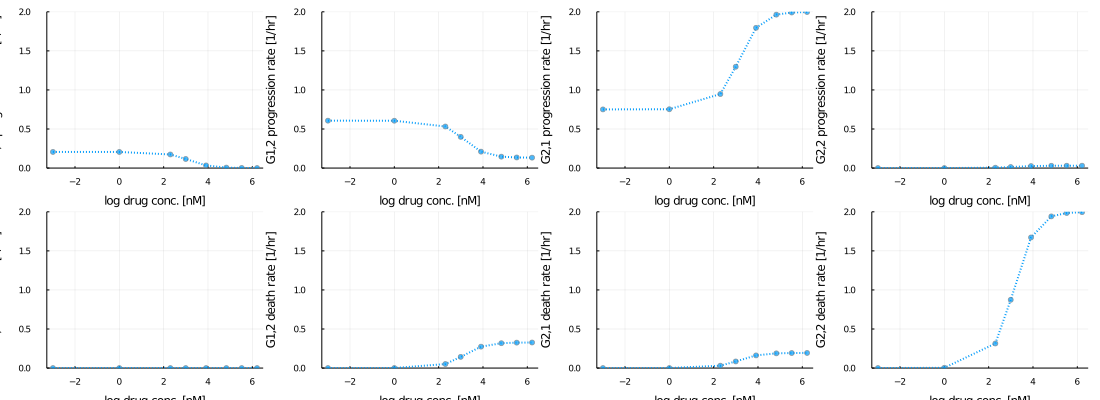

In [9]:
DrugResponseModel.plot_parameters(concs[:, 2], pp1[:, :, 2], zeros(8, 7))

In [18]:
a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 1, 3)

pp1 = DrugResponseModel.getODEparams(p2, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], pp1[:, 1, k], t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], 1, :false, concs[1, 1])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], i, :false, concs[i, 1]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)


In [ ]:
DrugResponseModel.plot_parameters(concs[:, 1], pp1[:, :, 1], zeros(8, 7))

In [ ]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 3], g2m[:, :, 3], 1, :false, concs[1, 3])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 3], g2m[:, :, 3], i, :false, concs[i, 3]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
p1=DrugResponseModel.plotperc(g2[:, :, 2], "gem.", concs[:, 3], "model")
p2=DrugResponseModel.plotperc(gdata2[:, :, 3], "gem.", concs[:, 3], "data")
plot(p1, p2)

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 3], pp1[:, :, 2], zeros(8, 7))

In [ ]:
#a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 2, 3)
p3 = [19.5133, 2.01514, 0.0221494, 0.456167, 0.390407, 2.0, 0.0205179, 0.0069432, 1.01511e-9, 0.14444, 0.531249, 5.79555, 1.60752, 0.300264, 0.492173, 0.190679, 0.990212, 1.0469e-9, 1.06128e-9, 0.0279224, 1.18084e-9, 0.441948, 2.0, 0.206729, 0.939593, 0.468727];
using Plots
pp1 = DrugResponseModel.getODEparamspairs(p3, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 2], g2m[:, :, 2], 1, :false, concs[1, 2])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 2], g2m[:, :, 2], i, :false, concs[i, 2]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 2], pp1[:, :, 1], zeros(8, 7))

In [ ]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 3], g2m[:, :, 3], 1, :false, concs[1, 3])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 3], g2m[:, :, 3], i, :false, concs[i, 3]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 3], pp1[:, :, 2], zeros(8, 7))

In [ ]:
#a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 1, 4)
p4 = [33.3703, 1.19243, 0.0331291, 0.0442161, 0.513058, 0.678679, 0.0157238, 0.00394221, 0.00692375, 1.16954e-9, 0.531837, 2.97956, 2.88671, 1.71067, 0.0638964, 2.0, 0.336735, 9.77487e-9, 0.0430892, 1.09105e-8, 0.00231518, 0.498326, 2.0, 0.203987, 0.725018, 0.568974];
pp1 = DrugResponseModel.getODEparamspairs(p4, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], 1, :false, concs[1, 1])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], i, :false, concs[i, 1]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 1], pp1[:, :, 1], zeros(8, 7))

In [ ]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], 1, :false, concs[1, 4])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], i, :false, concs[i, 4]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 4], pp1[:, :, 2], zeros(8, 7))

In [ ]:
#a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 2, 4)
p5 = [19.8052, 1.61367, 0.0272342, 0.501662, 0.474784, 2.0, 0.0242529, 0.0488431, 1.02986e-9, 0.0805864, 0.579608, 3.80863, 2.51815, 0.0918445, 1.64435e-9, 2.0, 0.0720509, 1.51462e-9, 0.0288849, 0.0319411, 0.0186419, 0.494724, 2.0, 0.201878, 0.718836, 0.585565];
pp1 = DrugResponseModel.getODEparamspairs(p5, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 2], g2m[:, :, 2], 1, :false, concs[1, 2])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 2], g2m[:, :, 2], i, :false, concs[i, 2]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 2], pp1[:, :, 1], zeros(8, 7))

In [ ]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], 1, :false, concs[1, 4])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], i, :false, concs[i, 4]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 4], pp1[:, :, 2], zeros(8, 7))

In [ ]:
#a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 3, 4)
p6 = [9.7291, 1.9724, 0.515963, 1.46484, 1.16859, 2.0, 0.0371012, 4.15166e-7, 1.69266e-7, 0.128604, 0.459572, 2.97266, 2.94866, 1.8291, 0.0649484, 2.0, 0.361753, 7.58154e-8, 0.0446008, 1.75339e-7, 1.55382e-7, 0.504308, 2.0, 0.205093, 0.838779, 0.522651];
pp1 = DrugResponseModel.getODEparamspairs(p6, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 3], g2m[:, :, 3], 1, :false, concs[1, 3])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 3], g2m[:, :, 3], i, :false, concs[i, 3]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 3], pp1[:, :, 1], zeros(8, 7))

In [ ]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], 1, :false, concs[1, 4])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], i, :false, concs[i, 4]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150) 

In [ ]:
DrugResponseModel.plot_parameters(concs[:, 4], pp1[:, :, 2], zeros(8, 7))